In [7]:
import pooch
import mrcfile
import torch
import matplotlib.pyplot as plt

from torch_peaks.find_peaks import peak_local_max_3d

from scipy.ndimage import maximum_filter

In [3]:

tomo = pooch.retrieve("https://ftp.ebi.ac.uk/pub/databases/emdb/structures/EMD-25061/map/emd_25061.map.gz",known_hash=None)


In [4]:
with mrcfile.open(tomo, mode='r') as mrc:
    # print the map header
    tomo_data = torch.tensor(mrc.data)


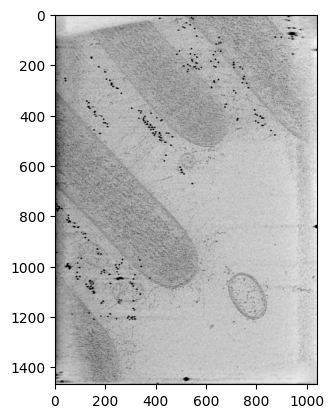

In [5]:
plt.imshow(torch.min(tomo_data, dim=0).values, cmap='gray',interpolation='mitchell', vmin=0, vmax=70)
plt.show()

In [10]:
with torch.no_grad():
    # Find peaks in the 3D volume
    peaks = peak_local_max_3d(
                volume = -1. * tomo_data,
                threshold_abs=30,
                min_distance=3,
            )

Max done
Mask done


In [8]:
tomo_np = tomo_data.numpy()

In [11]:
maximum_filter(
    tomo_np,
    size=7,
    
)

array([[[73, 73, 73, ..., 76, 76, 76],
        [75, 75, 75, ..., 76, 76, 76],
        [77, 77, 77, ..., 76, 76, 76],
        ...,
        [71, 71, 71, ..., 63, 63, 63],
        [68, 69, 69, ..., 61, 61, 61],
        [64, 65, 65, ..., 59, 59, 59]],

       [[73, 73, 73, ..., 76, 76, 76],
        [75, 75, 75, ..., 76, 76, 76],
        [77, 77, 77, ..., 76, 76, 76],
        ...,
        [71, 72, 72, ..., 63, 63, 63],
        [68, 69, 70, ..., 61, 61, 61],
        [64, 65, 66, ..., 59, 59, 59]],

       [[73, 73, 73, ..., 76, 76, 76],
        [75, 75, 75, ..., 76, 76, 76],
        [77, 77, 77, ..., 76, 76, 76],
        ...,
        [71, 72, 72, ..., 63, 63, 63],
        [68, 69, 70, ..., 61, 61, 61],
        [64, 65, 66, ..., 59, 59, 59]],

       ...,

       [[59, 59, 59, ..., 62, 62, 62],
        [59, 59, 59, ..., 64, 64, 64],
        [59, 59, 59, ..., 67, 67, 67],
        ...,
        [64, 64, 64, ..., 76, 76, 76],
        [64, 64, 64, ..., 76, 76, 76],
        [64, 64, 64, ..., 76, 76